# Problema 1

Ce îi poate face pe oameni fericiți? Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc.

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:

1.   doar de Produsul intern brut
2.   de Produsul intern brut si de gradul de libertate.

Specificaţi, proiectaţi, implementaţi si testati cate un algoritm de regresie pentru prima problema bazat pe:

metoda gradientului descrescator bazat pe batch-uri, cu tool/API si/sau cod propriu (tema).

Problema 1.1 - produsul intern brut - tool

In [ ]:
github_raw_url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab06/SGD/data/world-happiness-report-2017.csv'

In [ ]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import warnings; warnings.simplefilter('ignore')
import io
import requests
import pandas as pd
import seaborn as sns

In [ ]:
def loadDataFromGitHubFamily1(github_raw_url, inputVariabName, outputVariabName):
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

inputs, outputs = loadDataFromGitHubFamily1(github_raw_url, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


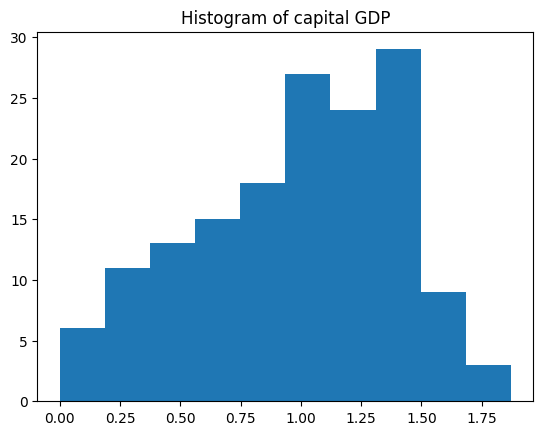

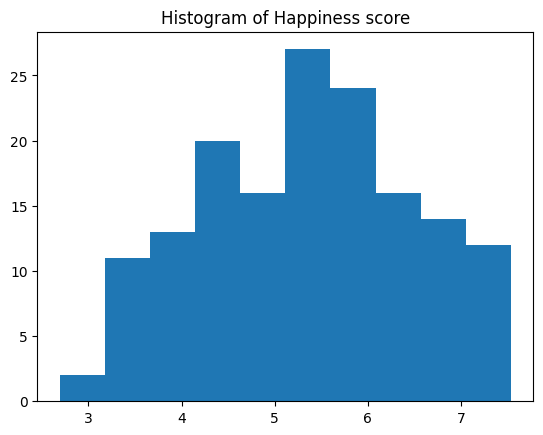

In [ ]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capital GDP")
plotDataHistogram(outputs, "Happiness score")

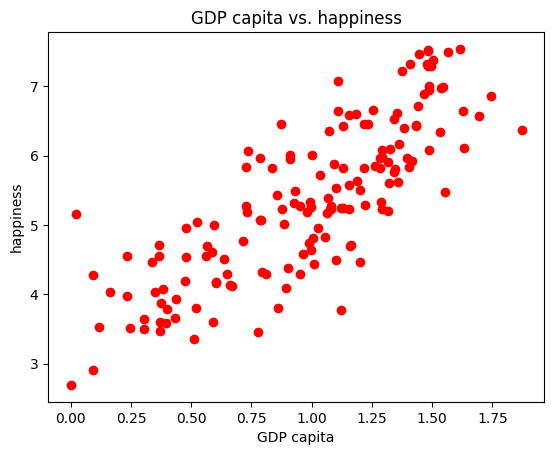

In [ ]:
def check_linearity(inputs, outputs):
  plt.plot(inputs, outputs, 'ro')
  plt.xlabel('GDP capita')
  plt.ylabel('happiness')
  plt.title('GDP capita vs. happiness')
  plt.show()

check_linearity(inputs, outputs)

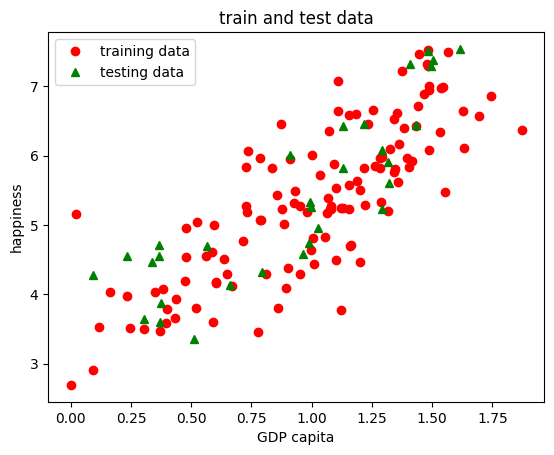

In [ ]:
def split_data_test(inputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  testSample = [i for i in indexes  if not i in trainSample]

  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]

  testInputs = [inputs[i] for i in testSample]
  testOutputs = [outputs[i] for i in testSample]

  plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
  plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')     #test data are plotted by green and a triangle sign
  plt.title('train and test data')
  plt.xlabel('GDP capita')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

  return trainInputs, trainOutputs, testInputs, testOutputs

trainInputs, trainOutputs, testInputs, testOutputs = split_data_test(inputs)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input
xx = [[el] for el in trainInputs]

# # using sklearn
regressor = SGDRegressor(
    penalty=None,
    learning_rate='constant',
    eta0=0.01,
    shuffle=False,
    max_iter=1,
    warm_start=True,
    random_state=42
)
n_epochs = 30
for epoch in range(n_epochs):
  regressor.partial_fit(xx, trainOutputs)
  if epoch % 5 == 0:
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print(f"Epoca: {epoch}, f(x) = {w0} + {w1} * x")

regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_[0], regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

Epoca: 0, f(x) = 2.4216285342734576 + 2.4715051736303177 * x
Epoca: 5, f(x) = 2.8360323243606587 + 2.458216840368487 * x
Epoca: 10, f(x) = 2.9752024842108127 + 2.330728908140295 * x
Epoca: 15, f(x) = 3.0593910868191414 + 2.2536068264600115 * x
Epoca: 20, f(x) = 3.1103196735229433 + 2.2069530217641544 * x
Epoca: 25, f(x) = 3.1411281305267496 + 2.1787305276981836 * x
the learnt model: f(x) =  3.1597652277718704  +  2.161657768541749  * x


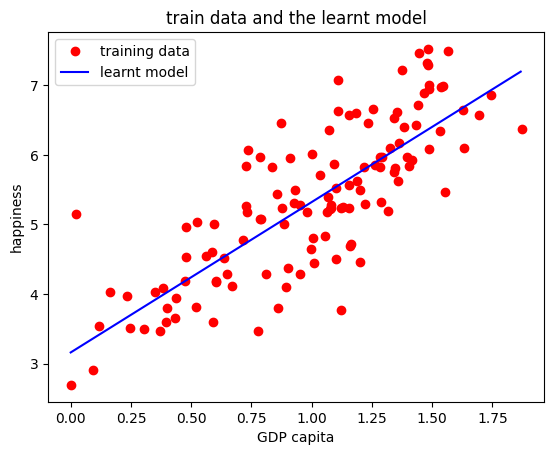

In [ ]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

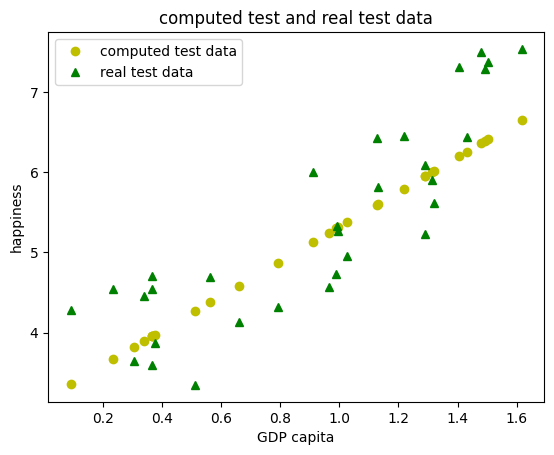

In [ ]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [ ]:
#compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.4251826679692228
prediction error (tool):   0.4251826679692228


Problema 1.1 - produsul intern brut - cod propriu

In [ ]:
import random

class MySGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    def fit(self, x, y, learningRate = 0.001, noEpochs = 1000):
        self.coef_ = [random.random() for _ in range(len(x[0]) + 1)]
        for epoch in range(noEpochs):
            sum_errors = 0.0
            sum_gradients = [0.0] * len(x[0])

            for i in range(len(x)):
                ycomputed = self.eval(x[i])
                error = ycomputed - y[i]
                sum_errors += error

                for j in range(len(x[0])):
                    sum_gradients[j] += error * x[i][j]

            for j in range(0, len(x[0])):   # update the coefficients
                self.coef_[j] -= learningRate * (sum_gradients[j] / len(x))

            self.coef_[-1] -= learningRate * (sum_errors / len(x))

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed

In [ ]:
# model initialisation
regressor = MySGDRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  2.5831687686583917  +  2.224019257645929  * x


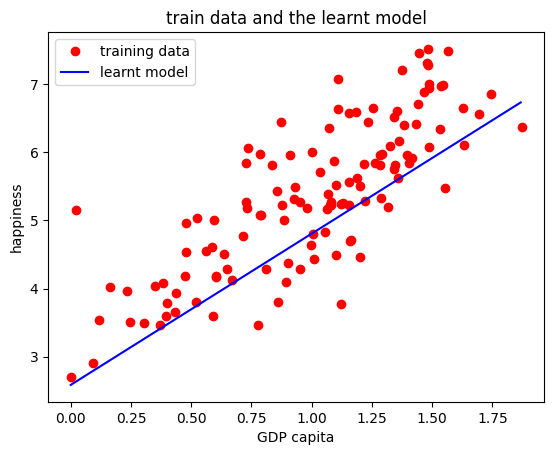

In [ ]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

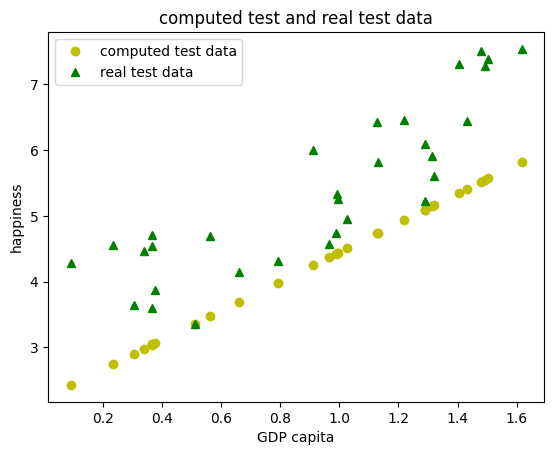

In [ ]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [ ]:
#compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.5607066695857013
prediction error (tool):   1.5607066695857015


Problema 1.2 - produsul intern brut si gradul de libertate - tool

In [ ]:

def loadDataFromGitHubGDP_F1(github_raw_url, inputVariabName1, inputVariabName2, outputVariabName):
    # Descarcă fișierul de pe GitHub
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

        gdp_idx = dataNames.index(inputVariabName1)
    freedom_idx = dataNames.index(inputVariabName2)
    happiness_idx = dataNames.index(outputVariabName)

    inputs = []
    outputs = []
    gdp_values = []
    freedom_values = []
    happiness_values = []
    invalid_rows = 0

    for row in data:
        try:
            gdp = float(row[gdp_idx])
            freedom = float(row[freedom_idx])
            happiness = float(row[happiness_idx])

            # Validare valori
            if gdp > 0 and freedom > 0 and happiness > 0:
                inputs.append([gdp, freedom])
                outputs.append(happiness)
                gdp_values.append(gdp)
                freedom_values.append(freedom)
                happiness_values.append(happiness)
            else:
                invalid_rows += 1
        except (ValueError, IndexError):
            invalid_rows += 1

    print(f"\nStatistici încărcare:")
    print(f"- Rânduri totale: {len(data)}")
    print(f"- Rânduri valide: {len(inputs)}")
    print(f"- Rânduri filtrate: {invalid_rows}")

    return inputs, outputs, gdp_values, freedom_values, happiness_values

inputs1, outputs1, gdp1, freedom1, happiness1 = loadDataFromGitHubGDP_F1(
        github_raw_url,
        'Economy..GDP.per.Capita.',
        'Freedom',
        'Happiness.Score'
    )


Statistici încărcare:
- Rânduri totale: 155
- Rânduri valide: 153
- Rânduri filtrate: 2


In [ ]:
def plot_histogramsGDP_F1(data, title, xlabel, color='skyblue'):
    """Funcție pentru plotarea histogramei"""
    plt.figure(figsize=(8, 5))
    plt.hist(data, color=color, alpha=0.7)
    plt.title(f'Distribuția {title}', fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frecvență', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

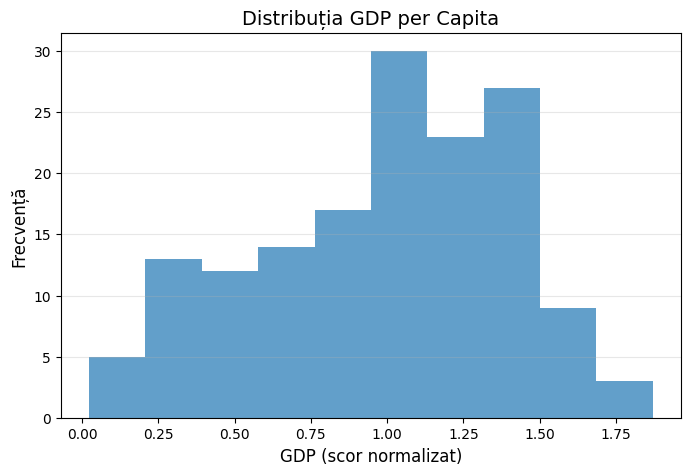

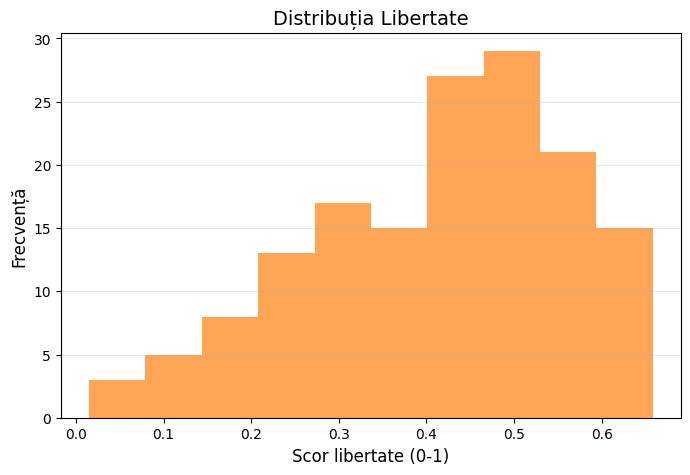

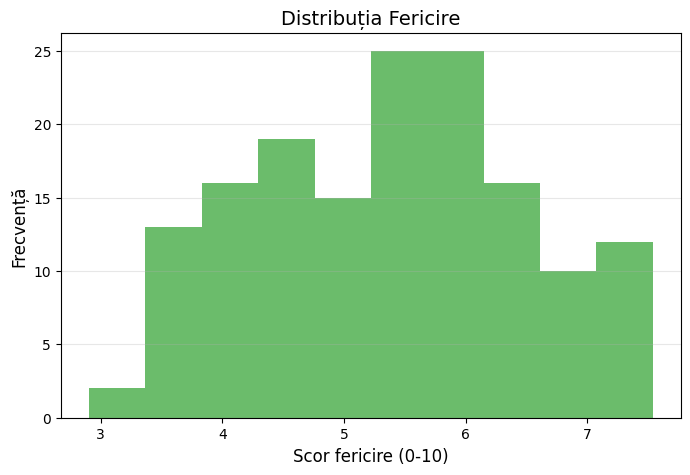

In [ ]:
plot_histogramsGDP_F1(gdp1, 'GDP per Capita', 'GDP (scor normalizat)', color='#1f77b4')
plot_histogramsGDP_F1(freedom1, 'Libertate', 'Scor libertate (0-1)', color='#ff7f0e')
plot_histogramsGDP_F1(happiness1, 'Fericire', 'Scor fericire (0-10)', color='#2ca02c')

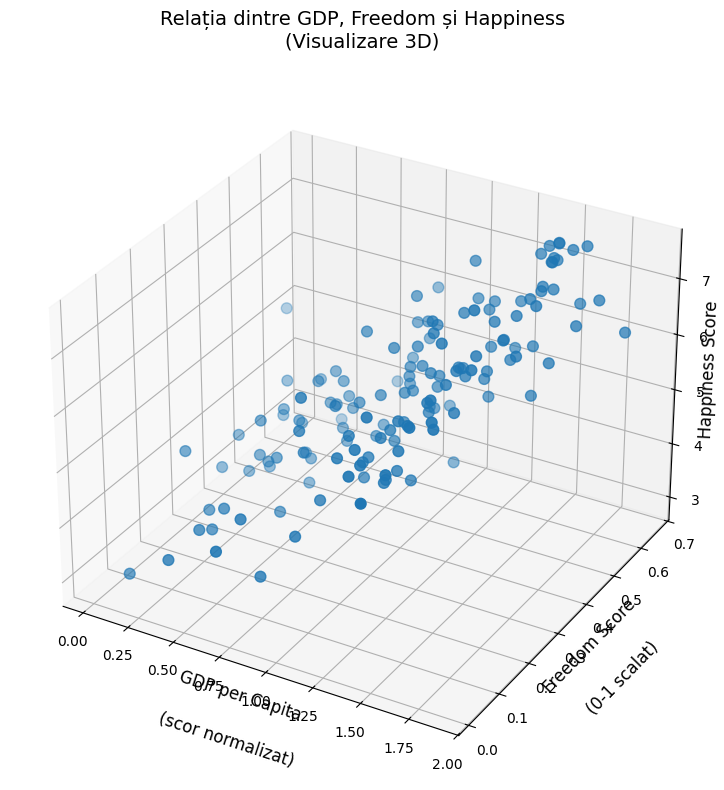

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def checkLinearity3D(inputs, outputs, figsize=(14, 10)):
    """
    Vizualizare 3D mare a relației dintre GDP, Freedom și Happiness
    Args:
        inputs: Listă de tuple (GDP, Freedom)
        outputs: Listă de scoruri Happiness
        figsize: Dimensiunea figurii (lățime, înălțime)
    """
    gdp = [x[0] for x in inputs]
    freedom = [x[1] for x in inputs]
    happiness = outputs

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        gdp, freedom, happiness,
        s=60
    )

    ax.set_xlabel('GDP per Capita\n(scor normalizat)', fontsize=12, linespacing=3)
    ax.set_ylabel('Freedom Score\n(0-1 scalat)', fontsize=12, linespacing=3)
    ax.set_zlabel('Happiness Score\n(0-10)', fontsize=12, linespacing=3)

    plt.title('Relația dintre GDP, Freedom și Happiness\n(Visualizare 3D)',
             fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

checkLinearity3D(inputs1, outputs1, figsize=(10, 8))

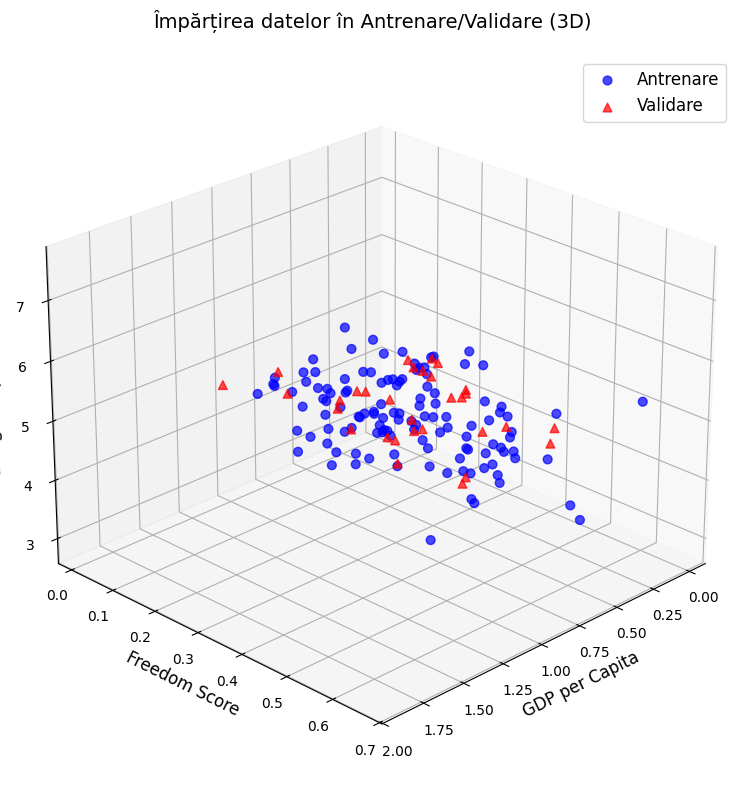

Statistici împărțire:
- Total instanțe: 153
- Antrenare: 122 (79.7%)
- Validare: 31 (20.3%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def data_split_gdp_freedom_happiness(inputs, outputs):
  np.random.seed(5)
  indexes = np.arange(len(inputs))
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
  validationSample = np.setdiff1d(indexes, trainSample)

  trainGDP = [inputs[i][0] for i in trainSample]
  trainFreedom = [inputs[i][1] for i in trainSample]
  trainHappiness = [outputs[i] for i in trainSample]

  valGDP = [inputs[i][0] for i in validationSample]
  valFreedom = [inputs[i][1] for i in validationSample]
  valHappiness = [outputs[i] for i in validationSample]

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(trainGDP, trainFreedom, trainHappiness,
            c='blue', marker='o', s=40, alpha=0.7, label='Antrenare')

  ax.scatter(valGDP, valFreedom, valHappiness,
            c='red', marker='^', s=40, alpha=0.7, label='Validare')

  ax.set_xlabel('GDP per Capita', fontsize=12)
  ax.set_ylabel('Freedom Score', fontsize=12)
  ax.set_zlabel('Happiness Score', fontsize=12)
  ax.set_title('Împărțirea datelor în Antrenare/Validare (3D)', fontsize=14, pad=20)
  ax.legend(fontsize=12)
  ax.grid(True, alpha=0.3)

  ax.view_init(elev=25, azim=45)

  plt.tight_layout()
  plt.show()

  print(f"Statistici împărțire:")
  print(f"- Total instanțe: {len(inputs)}")
  print(f"- Antrenare: {len(trainSample)} ({len(trainSample)/len(inputs):.1%})")
  print(f"- Validare: {len(validationSample)} ({len(validationSample)/len(inputs):.1%})")

  return trainGDP, trainFreedom, trainHappiness, valGDP, valFreedom, valHappiness

trainGDP1, trainFreedom1, trainHappiness1, valGDP1, valFreedom1, valHappiness1 = data_split_gdp_freedom_happiness(inputs1, outputs1)

In [ ]:
from sklearn.linear_model import SGDRegressor
import numpy as np

regressor = SGDRegressor(
    penalty=None,           # Fără regularizare
    learning_rate="constant",
    eta0=0.01,            # Rata de învățare mică
    max_iter=1,           # 1 epocă per fit
    tol=None,             # Dezactivează oprirea anticipată
    shuffle=False,        # Important pentru BGD
    warm_start=True,      # Păstrează coeficienții între apeluri
    random_state=42
)

print(f"Lungimi liste originale:")
print(f"- trainGDP: {len(trainGDP1)}")
print(f"- trainFreedom: {len(trainFreedom1)}")
print(f"- trainOutputs: {len(trainOutputs)}")

min_len = min(len(trainGDP1), len(trainFreedom1), len(trainOutputs))
print(f"\nSe vor folosi primele {min_len} valori din fiecare listă")

trainGDP1 = trainGDP1[:min_len]
trainFreedom1 = trainFreedom1[:min_len]
trainOutputs = trainOutputs[:min_len]

X_train = np.column_stack((trainGDP1, trainFreedom1))
y_train = np.array(trainOutputs)

n_epochs = 1000
for epoch in range(n_epochs):
    regressor.partial_fit(X_train,y_train)

    if epoch % 100 == 0:
        w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
        print(f"Epoca {epoch}: f(x) = {w0:.4f} + {w1:.4f}*x1 + {w2:.4f}*x2")

# Coeficienții finali
w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
print('Modelul învățat: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

Lungimi liste originale:
- trainGDP: 122
- trainFreedom: 122
- trainOutputs: 124

Se vor folosi primele 122 valori din fiecare listă
Epoca 0: f(x) = 2.3399 + 2.0413*x1 + 0.9617*x2
Epoca 100: f(x) = 5.0571 + 0.2471*x1 + -0.0776*x2
Epoca 200: f(x) = 5.1302 + 0.2671*x1 + -0.3075*x2
Epoca 300: f(x) = 5.1406 + 0.2700*x1 + -0.3402*x2
Epoca 400: f(x) = 5.1421 + 0.2704*x1 + -0.3448*x2
Epoca 500: f(x) = 5.1423 + 0.2705*x1 + -0.3455*x2
Epoca 600: f(x) = 5.1424 + 0.2705*x1 + -0.3456*x2
Epoca 700: f(x) = 5.1424 + 0.2705*x1 + -0.3456*x2
Epoca 800: f(x) = 5.1424 + 0.2705*x1 + -0.3456*x2
Epoca 900: f(x) = 5.1424 + 0.2705*x1 + -0.3456*x2
Modelul învățat: f(x) =  5.142362451731412  +  0.2704764348205947  * x1 +  -0.34560908975591786  * x2


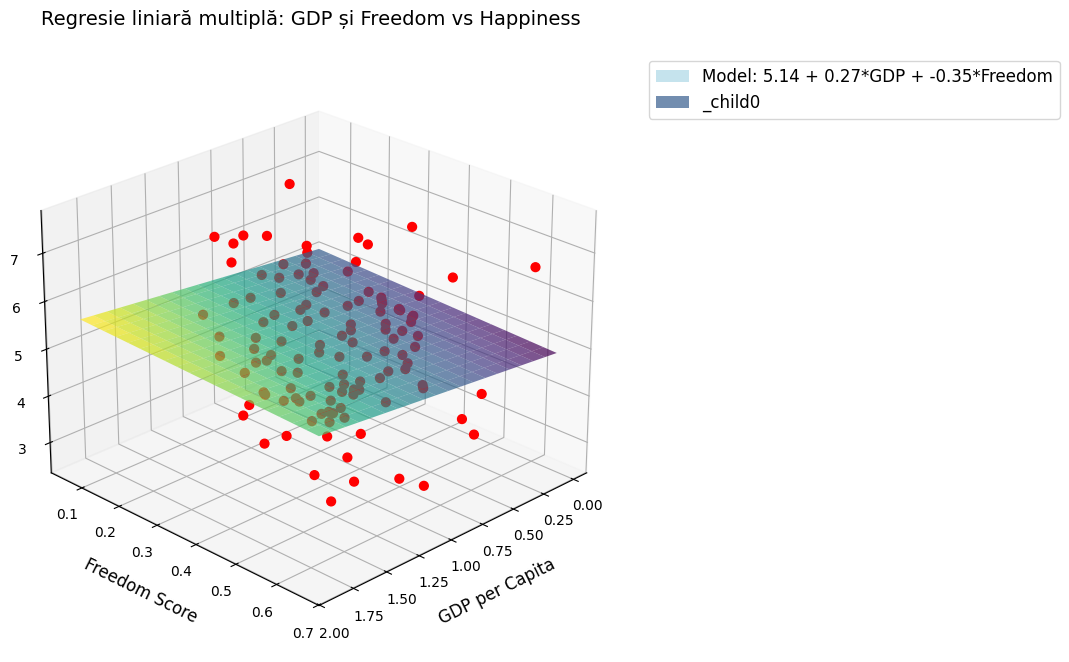

In [ ]:
def plot_3d_regression(X_train, y_train, regressor):
    """
    Vizualizare 3D a modelului de regresie cu două variabile
    Args:
        X_train: matrice numpy de forma (n_samples, 2) [GDP, Freedom]
        y_train: vector numpy de forma (n_samples,) [Happiness]
        regressor: modelul LinearRegression antrenat
    """
    # Extract coefficients as scalars
    w0 = regressor.intercept_[0] if hasattr(regressor.intercept_, '__len__') else regressor.intercept_
    w1, w2 = regressor.coef_[0], regressor.coef_[1]

    gdp = X_train[:, 0]
    freedom = X_train[:, 1]

    gdp_range = np.linspace(min(gdp), max(gdp), 20)
    freedom_range = np.linspace(min(freedom), max(freedom), 20)
    gdp_grid, freedom_grid = np.meshgrid(gdp_range, freedom_range)

    happiness_grid = w0 + w1*gdp_grid + w2*freedom_grid

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface (removed label from plot_surface as it doesn't work there)
    surf = ax.plot_surface(gdp_grid, freedom_grid, happiness_grid,
                         alpha=0.7, cmap='viridis')

    # Create proxy artist for legend
    from matplotlib.patches import Patch
    surf_proxy = Patch(facecolor='lightblue', alpha=0.7,
                      label=f'Model: {w0:.2f} + {w1:.2f}*GDP + {w2:.2f}*Freedom')

    ax.scatter(gdp, freedom, y_train,
              c='red', s=40, alpha=1,
              label='Date observate')

    ax.set_xlabel('GDP per Capita', fontsize=12, labelpad=10)
    ax.set_ylabel('Freedom Score', fontsize=12, labelpad=10)
    ax.set_zlabel('Happiness Score', fontsize=12, labelpad=10)
    ax.set_title('Regresie liniară multiplă: GDP și Freedom vs Happiness',
                fontsize=14, pad=20)

    ax.view_init(elev=25, azim=45)

    ax.legend(handles=[surf_proxy, ax.collections[0]],
             fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
plot_3d_regression(X_train, y_train, regressor)

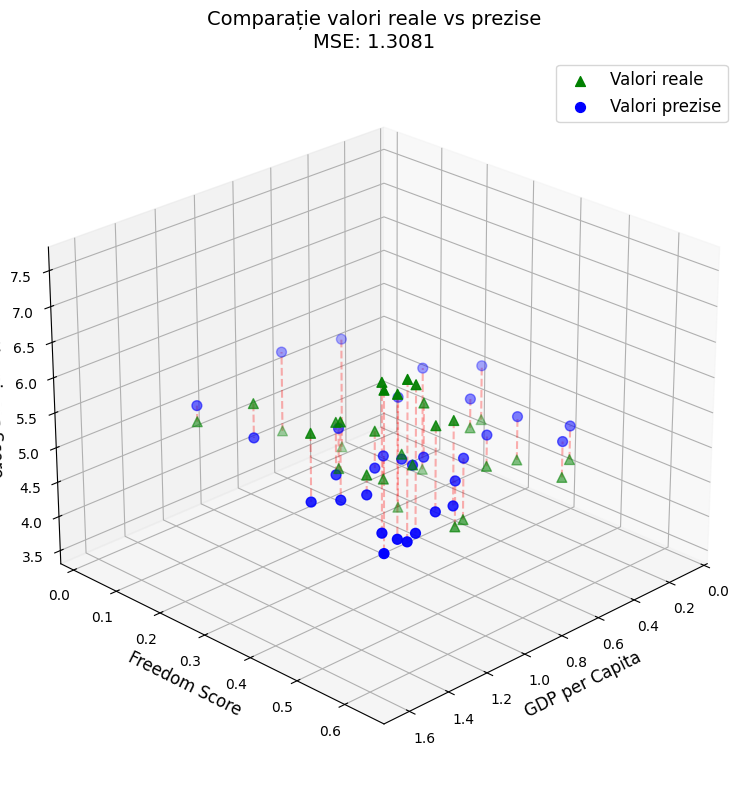

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compare_validation_and_computed_outputs(valGDP, valFreedom, validationOutputs):
  min_length = min(len(valGDP), len(valFreedom), len(validationOutputs))
  valGDP = valGDP[:min_length]
  valFreedom = valFreedom[:min_length]
  validationOutputs = validationOutputs[:min_length]

  validationInputs = np.column_stack((valGDP, valFreedom))
  validationOutputs = np.array(validationOutputs)

  computedValidationOutputs = regressor.predict(validationInputs)
  errors = validationOutputs - computedValidationOutputs
  mse = np.mean(errors**2)

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(valGDP, valFreedom, validationOutputs,
            c='green', marker='^', s=50, label='Valori reale')

  ax.scatter(valGDP, valFreedom, computedValidationOutputs,
            c='blue', marker='o', s=50, label='Valori prezise')

  for gdp, freedom, real, pred in zip(valGDP, valFreedom, validationOutputs, computedValidationOutputs):
      ax.plot([gdp, gdp], [freedom, freedom], [real, pred], 'r--', alpha=0.3)

  ax.set_xlabel('GDP per Capita', fontsize=12)
  ax.set_ylabel('Freedom Score', fontsize=12)
  ax.set_zlabel('Happiness Score', fontsize=12)
  ax.set_title(f'Comparație valori reale vs prezise\nMSE: {mse:.4f}', fontsize=14)
  ax.legend(fontsize=12)
  ax.view_init(elev=25, azim=45)
  plt.tight_layout()
  plt.show()

  return computedValidationOutputs

computedValidationOutputs = compare_validation_and_computed_outputs(valGDP1, valFreedom1, valHappiness1)

In [ ]:
#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedTestOutputs, valHappiness1):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(valHappiness1, computedTestOutputs)
print('prediction error (tool):   ', error)


prediction error (manual):  1.6948381384401605
prediction error (tool):    1.6948381384401605


# Problema 2
Clasificarea țesuturilor cancerigene Se consideră informații despre cancerul de sân la femei, informații extrase din ecografii mamare (detalii aici) precum: - Tipul malformației identificate (țesut benign sau țesut malign) - Caracteristici numerice ale nucleului celulelor din aceste țesuturi: - raza (media distanțelor între centru si punctele de pe contur) - textura (măsurată prin deviația standard a nivelelor de gri din imaginea asociată țesutului analizat) Folosindu-se aceste date, să se decidă dacă țesutul dintr-o nouă ecografie (pentru care se cunosc cele 2 caracteristici numerice – raza și textura –) va fi etichetat ca fiind malign sau benign.


In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://archive.ics.uci.edu/static/public/17/data.csv"
r = requests.get(url)
filePath = io.StringIO(r.text)

data = pd.read_csv(filePath)
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
data['Diagnosis'] = data['Diagnosis'].map({'M':1, 'B':0})
data['radius_mean'] = (data['radius1'] + data['radius2'] + data['radius3']) / 3
data['texture_mean'] = (data['texture1'] + data['texture2'] + data['texture3']) / 3

data = data[['Diagnosis', 'radius_mean', 'texture_mean']]

data.head()

,Diagnosis,radius_mean,texture_mean
0,1,14.821667,9.538433
1,1,15.367833,13.971300
2,1,14.668533,15.855633
3,1,8.941867,16.012000
4,1,14.529067,10.597100


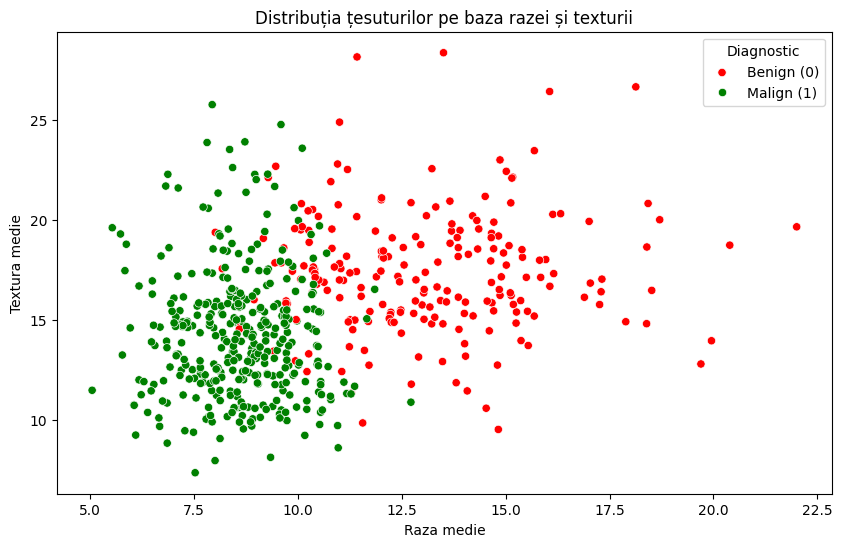

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='Diagnosis', data=data, palette=['green','red'])
plt.title('Distribuția țesuturilor pe baza razei și texturii')
plt.xlabel('Raza medie')
plt.ylabel('Textura medie')
plt.legend(title='Diagnostic', labels=['Benign (0)', 'Malign (1)'])
plt.show()


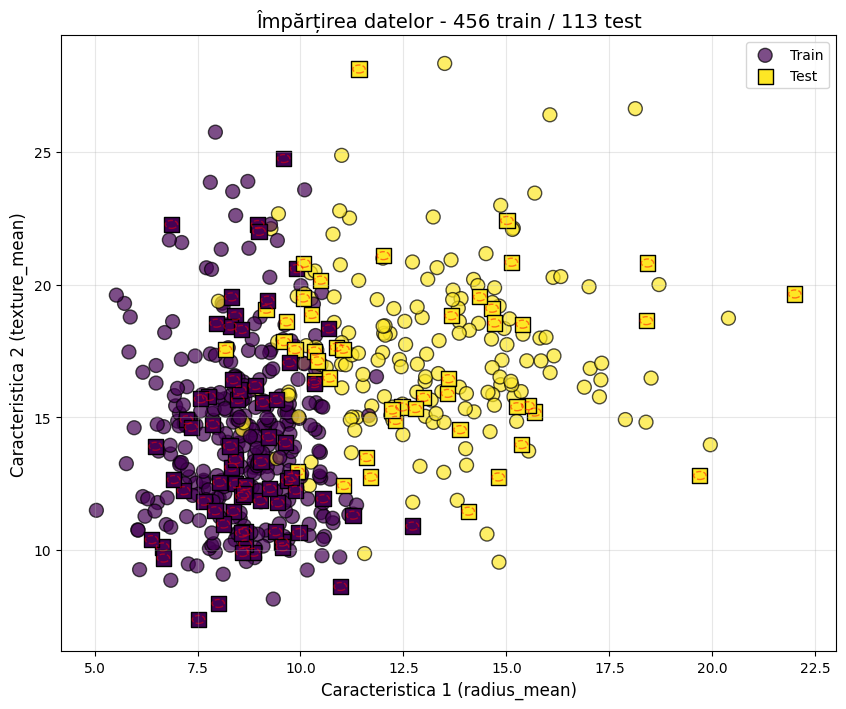

X_train shape: (456, 2)
X_test shape: (113, 2)
y_train shape: (456,)
y_test shape: (113,)


In [ ]:
def train_test_split(X, y, test_size = 0.2, random_state = None, plot = False):
  if random_state is not None:
    np.random.seed(random_state)

  if isinstance(X, pd.DataFrame):
      X = X.values
  if isinstance(y, pd.Series):
      y = y.values

  n_samples = len(X)
  n_test = int(n_samples * test_size)
  n_train = n_samples - n_test

  indexes = np.arange(n_samples)
  np.random.shuffle(indexes)

  train_indexes = indexes[:n_train]
  test_indexes = indexes[n_train:]

  X_train = X[train_indexes]
  X_test = X[test_indexes]
  y_train = y[train_indexes]
  y_test = y[test_indexes]

  if plot:
        plt.figure(figsize=(10, 8))
        if X.shape[1] >= 2:
            x1, x2 = X[:, 0], X[:, 1]
        else:
            x1, x2 = X[:, 0], np.zeros_like(X[:, 0])

        plt.scatter(x1[train_indexes], x2[train_indexes],
                   c=y_train, cmap='viridis',
                   marker='o', edgecolor='k',
                   s=100, label='Train', alpha=0.7)

        plt.scatter(x1[test_indexes], x2[test_indexes],
                   c=y_test, cmap='viridis',
                   marker='s', edgecolor='k',
                   s=120, label='Test', alpha=1.0)
        plt.title(f'Împărțirea datelor - {len(train_indexes)} train / {len(test_indexes)} test', fontsize=14)
        plt.xlabel('Caracteristica 1 (radius_mean)', fontsize=12)
        plt.ylabel('Caracteristica 2 (texture_mean)', fontsize=12)
        plt.legend()

        for i in test_indexes:
            plt.gca().add_patch(plt.Circle((x1[i], x2[i]),
                                         radius=0.15,
                                         color='red',
                                         fill=False,
                                         linestyle='--',
                                         alpha=0.5))

        plt.grid(True, alpha=0.3)
        plt.show()

  return X_train, X_test, y_train, y_test


X = data[['radius_mean', 'texture_mean']]
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, plot = True)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

def learn_logistic_model_2d(trainInputs, trainOutputs):
    classifier = LogisticRegression()
    classifier.fit(trainInputs, trainOutputs)

    w0 = classifier.intercept_[0]
    w1, w2 = classifier.coef_[0]
    print(f'Model logistic:')
    print(f'P(y=1|x) = 1 / (1 + exp(-({w0:.4f} + {w1:.4f}*radius + {w2:.4f}*texture))')
    print(f'\nCoeficienți:')
    print(f'Intercept (w0): {w0:.4f}')
    print(f'radius coef (w1): {w1:.4f}')
    print(f'texture coef (w2): {w2:.4f}')

    acc = classifier.score(trainInputs, trainOutputs)
    print(f'\nAccuracy pe datele de antrenare: {acc:.2%}')

    y_pred = classifier.predict(trainInputs)

    return classifier, w0, w1, w2, y_pred

classifier, w0, w1, w2, y_pred = learn_logistic_model_2d(X_train, y_train)

Model logistic:
P(y=1|x) = 1 / (1 + exp(-(-24.7786 + 1.8229*radius + 0.3470*texture))

Coeficienți:
Intercept (w0): -24.7786
radius coef (w1): 1.8229
texture coef (w2): 0.3470

Accuracy pe datele de antrenare: 94.52%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
    }


    print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}")
    print(f"Recall:    {test_metrics['recall']:.4f}")
    print(f"F1-score:  {test_metrics['f1']:.4f}")


    return {'test': test_metrics}

metrics = evaluate_model(classifier, X_train, y_train, X_test, y_test)

Accuracy:  0.8938
Precision: 0.9048
Recall:    0.8261
F1-score:  0.8636


In [ ]:
new_lesion = [[18, 10]]  # Raza=18, Textura=10
prediction = classifier.predict(new_lesion)
pred_prob = classifier.predict_proba(new_lesion)

print(f"\nRezultat clasificare pentru leziunea cu raza=18 și textura=10:")
print(f"Diagnostic: {'MALIGN (1)' if prediction[0] == 1 else 'BENIGN (0)'}")
print(f"Probabilități: [Benign: {pred_prob[0][0]:.2%}, Malign: {pred_prob[0][1]:.2%}]")


Rezultat clasificare pentru leziunea cu raza=18 și textura=10:
Diagnostic: MALIGN (1)
Probabilități: [Benign: 0.00%, Malign: 100.00%]


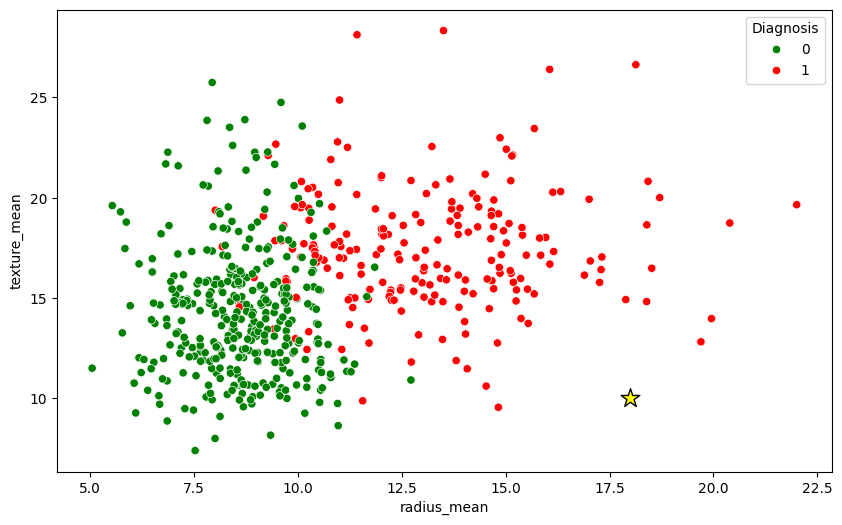

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='Diagnosis', data=data, palette=['green','red'])
plt.scatter(18, 10, c='yellow', s=200, marker='*', edgecolors='black', label='Leziune nouă')

Problema 2 - cod propriu

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, threshold=0.5,
                 loss_function='binary', l2_penalty=0.1, verbose=False):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.threshold = threshold
        self.loss_function = loss_function
        self.l2_penalty = l2_penalty
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.val_loss_history = []

    def sigmoid(self, z):
        """Functia sigmoida (1/(1+e^-z))"""
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred):
        epsilon = 1e-9

        if self.loss_function == 'binary':
            loss = -np.mean(y_true*np.log(y_pred+epsilon) + (1-y_true)*np.log(1-y_pred+epsilon))
        elif self.loss_function == 'mse':
            loss = np.mean((y_true - y_pred)**2)
        elif self.loss_function == 'mae':
            loss = np.mean(np.abs(y_true - y_pred))

        if self.l2_penalty > 0:
            loss += 0.5 * self.l2_penalty * np.sum(self.weights**2)
        return loss

    def accuracy(self,y_true,y_pred):
        accuracy=np.sum(y_true==y_pred)/len(y_true)
        return accuracy

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if X_val is not None and y_val is not None:
                val_pred = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
                val_loss = self._compute_loss(y_val, val_pred)
                self.val_loss_history.append(val_loss)

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= self.threshold).astype(int)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y_proba = self.predict_proba(X)

        return {
            'accuracy': self.accuracy(y, y_pred),
            'precision': precision_score(y, y_pred),
            'recall': recall_score(y, y_pred),
            'f1': f1_score(y, y_pred),
            'loss': self._compute_loss(y, y_proba)
        }

    def cross_validate(self, X, y, n_splits=5, metrics=None, random_state=None):
        if metrics is None:
            metrics = ['accuracy', 'precision', 'recall', 'f1']

        kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        results = {metric: [] for metric in metrics}

        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            self.fit(X_train, y_train)

            y_pred = self.predict(X_val)
            y_proba = self.predict_proba(X_val)

            if 'accuracy' in metrics:
                results['accuracy'].append(self.accuracy(y_val, y_pred))
            if 'precision' in metrics:
                results['precision'].append(precision_score(y_val, y_pred))
            if 'recall' in metrics:
                results['recall'].append(recall_score(y_val, y_pred))
            if 'f1' in metrics:
                results['f1'].append(f1_score(y_val, y_pred))
        cv_results = {
          metric: {
              'mean': np.mean(values),
              'std': np.std(values)
          }
          for metric, values in results.items()
       }

        return cv_results

    def plot_learning_curve(self):
        plt.plot(self.loss_history, label='Train Loss')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label='Validation Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def evaluate_thresholds(self, X, y, thresholds=np.linspace(0.1, 0.9, 9)):
        y_proba = self.predict_proba(X)
        results = []

        for thresh in thresholds:
            y_pred = (y_proba >= thresh).astype(int)
            results.append({
                'threshold': thresh,
                'accuracy': accuracy_score(y, y_pred),
                'precision': precision_score(y, y_pred),
                'recall': recall_score(y, y_pred),
                'f1': f1_score(y, y_pred),
            })

        return results

    def compare_loss_functions(self, X, y, loss_functions=None, n_splits=5, metrics=None, random_state=42):

      if loss_functions is None:
          loss_functions = ['binary', 'mse', 'mae', 'huber', 'hinge']

      if metrics is None:
          metrics = ['accuracy', 'f1', 'roc_auc']

      results = {}

      for loss_func in loss_functions:
          if self.verbose:
              print(f"\nEvaluating {loss_func} loss function...")

          temp_model = MyLogisticRegression(
              learning_rate=self.learning_rate,
              iterations=self.iterations,
              threshold=self.threshold,
              loss_function=loss_func,
              l2_penalty=self.l2_penalty,
              verbose=self.verbose
          )

          cv_results = temp_model.cross_validate(
              X, y,
              n_splits=n_splits,
              metrics=metrics,
              random_state=random_state
          )

          results[loss_func] = cv_results

          if self.verbose:
              print(f"Results for {loss_func}:")
              for metric in cv_results:
                  print(f"  {metric}: {cv_results[metric]['mean']:.4f} ± {cv_results[metric]['std']:.4f}")

      self._plot_loss_comparison(results)

      return results

    def _plot_loss_comparison(self, results):
      loss_funcs = list(results.keys())
      metrics = list(results[loss_funcs[0]].keys())

      plt.figure(figsize=(12, 6))

      for i, metric in enumerate(metrics):
          plt.subplot(1, len(metrics), i+1)
          means = [results[lf][metric]['mean'] for lf in loss_funcs]
          stds = [results[lf][metric]['std'] for lf in loss_funcs]

          plt.bar(loss_funcs, means, yerr=stds, capsize=5)
          plt.title(metric.upper())
          plt.ylabel('Score')
          plt.grid(axis='y', alpha=0.3)

      plt.suptitle('Performance Comparison of Loss Functions')
      plt.tight_layout()
      plt.show()

In [ ]:
def learn_logistic_model_2d(trainInputs, trainOutputs):
    model = MyLogisticRegression(
        learning_rate=0.1,
        iterations=1000,
        threshold=0.5,
        loss_function='binary',
        verbose=False
    )
    model.fit(trainInputs, trainOutputs)

    w0 = model.bias
    w1, w2 = model.weights[0], model.weights[1]

    print("\n" + "="*50)
    print("Model Logistic Regression")
    print("="*50)
    print(f"Intercept (w0): {w0:.4f}")
    print(f"Radius coefficient (w1): {w1:.4f}")
    print(f"Texture coefficient (w2): {w2:.4f}")
    print("\nEcuația modelului:")
    print(f"P(y=1|x) = 1 / (1 + exp(-({w0:.4f} + {w1:.4f}*radius + {w2:.4f}*texture)))")

    y_pred = model.predict(trainInputs)
    acc = accuracy_score(trainOutputs, y_pred)
    print("\nMetrici pe setul de antrenare:")
    print(f"Accuracy: {acc:.4f}")
    print("="*50 + "\n")

    return model, w0, w1, w2, y_pred

classifier, w0, w1, w2, y_pred = learn_logistic_model_2d(X_train, y_train)


Model Logistic Regression
Intercept (w0): -6.2524
Radius coefficient (w1): 2.0740
Texture coefficient (w2): -0.6980

Ecuația modelului:
P(y=1|x) = 1 / (1 + exp(-(-6.2524 + 2.0740*radius + -0.6980*texture)))

Metrici pe setul de antrenare:
Accuracy: 0.5592



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5):
    y_test_pred = model.predict(X_test)

    test_metrics = {
        'accuracy': classifier.accuracy(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
    }


    print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}")
    print(f"Recall:    {test_metrics['recall']:.4f}")
    print(f"F1-score:  {test_metrics['f1']:.4f}")


    return { 'test': test_metrics}

metrics = evaluate_model(classifier, X_train, y_train, X_test, y_test)

Accuracy:  0.5575
Precision: 0.4778
Recall:    0.9348
F1-score:  0.6324


In [ ]:
new_lesion = np.array([[18, 10]])  # Raza=18, Textura=10
pred_prob = classifier.predict_proba(new_lesion)
prediction = classifier.predict(new_lesion)

print(f"\nRezultat clasificare pentru leziunea cu raza=18 și textura=10:")
print(f"Diagnostic: {'MALIGN (1)' if prediction[0] == 1 else 'BENIGN (0)'}")
print(f"Probabilități: [Benign: {100 - pred_prob[0] * 100:.2f}%, Malign: {pred_prob[0] * 100:.2f}%]")



Rezultat clasificare pentru leziunea cu raza=18 și textura=10:
Diagnostic: MALIGN (1)
Probabilități: [Benign: 0.00%, Malign: 100.00%]


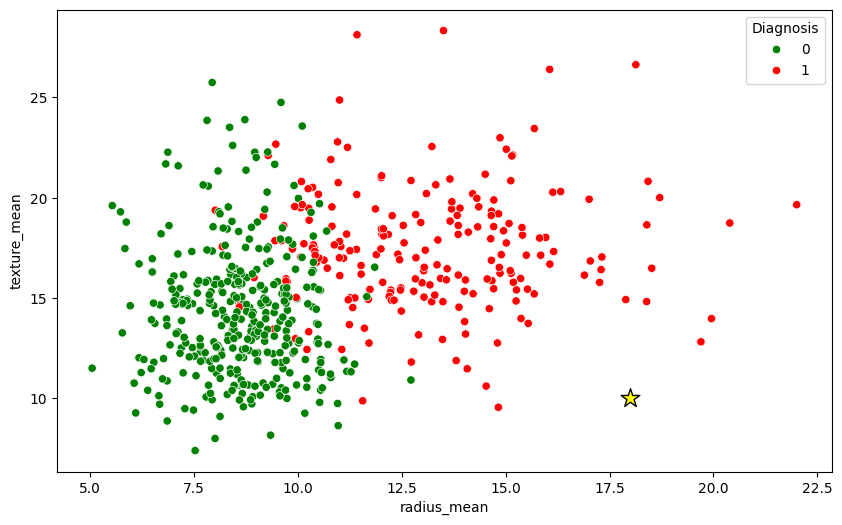

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='Diagnosis', data=data, palette=['green','red'])
plt.scatter(18, 10, c='yellow', s=200, marker='*', edgecolors='black', label='Leziune nouă')

In [ ]:
model = MyLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train, X_test, y_test)

In [ ]:
cv_results = model.cross_validate(
    X=X_train,
    y=y_train,
    n_splits=5
)

print("Rezultate Cross-Validation")
for metric in cv_results:
    print(f"{metric.upper():<10} {cv_results[metric]['mean']:.4f} ± {cv_results[metric]['std']:.4f}")
print("="*50)

Rezultate Cross-Validation
ACCURACY   0.5569 ± 0.0389
PRECISION  0.4495 ± 0.0571
RECALL     0.9774 ± 0.0208
F1         0.6132 ± 0.0511



Evaluating binary loss function...
Results for binary:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696

Evaluating mse loss function...
Results for mse:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696

Evaluating mae loss function...
Results for mae:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696


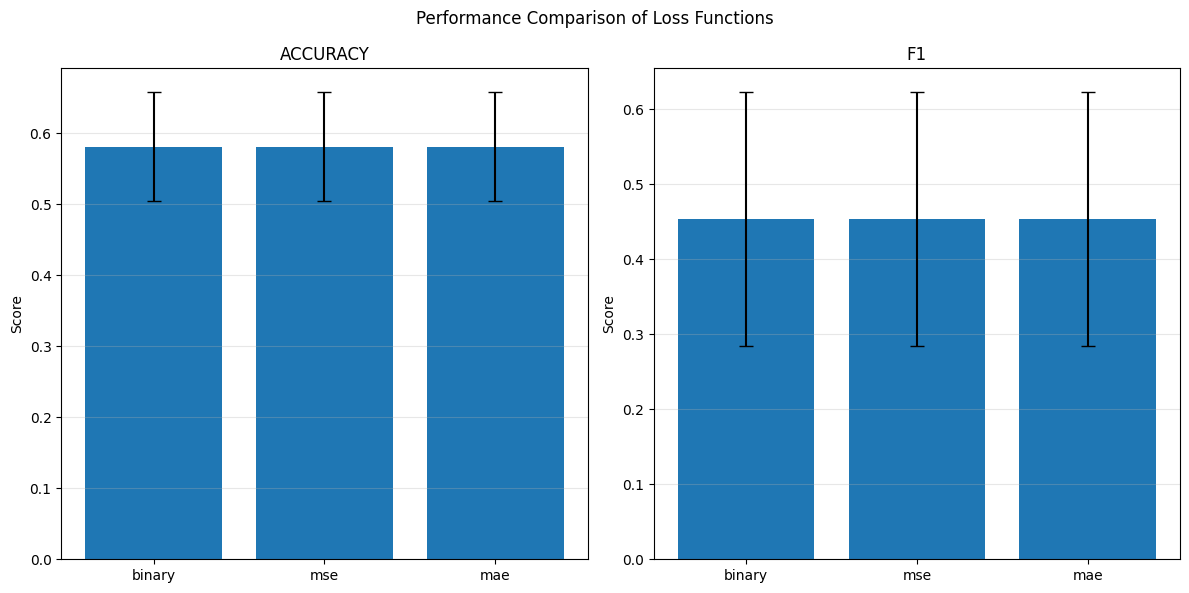


Final Comparison:

binary loss:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696

mse loss:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696

mae loss:
  accuracy: 0.5813 ± 0.0773
  f1: 0.4535 ± 0.1696


In [ ]:
model = MyLogisticRegression(learning_rate=0.1, iterations=1000, verbose=True)

loss_comparison = model.compare_loss_functions(
    X=X_train,
    y=y_train,
    loss_functions=['binary', 'mse', 'mae'],
    n_splits=5,
    metrics=['accuracy', 'f1']
)

print("\nFinal Comparison:")
for loss_func in loss_comparison:
    print(f"\n{loss_func} loss:")
    for metric in loss_comparison[loss_func]:
        stats = loss_comparison[loss_func][metric]
        print(f"  {metric}: {stats['mean']:.4f} ± {stats['std']:.4f}")

In [ ]:
model = MyLogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

threshold_results = model.evaluate_thresholds(X_test, y_test)

print("\n" + "="*78)
print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("="*78)
for res in threshold_results:
    print(f"{res['threshold']:.2f}:".ljust(10),
          f"{res['accuracy']:.4f}".ljust(10),
          f"{res['precision']:.4f}".ljust(10),
          f"{res['recall']:.4f}".ljust(10),
          f"{res['f1']:.4f}".ljust(10)
    )
print("="*78 + "\n")

best_threshold = max(threshold_results, key=lambda x: x['f1'])
print(f"Prag optim (după F1-score): {best_threshold['threshold']:.2f}")
print(f"Metricile la prag optim:")
print(f"• Accuracy: {best_threshold['accuracy']:.4f}")
print(f"• Precision: {best_threshold['precision']:.4f}")
print(f"• Recall: {best_threshold['recall']:.4f}")
print(f"• F1-score: {best_threshold['f1']:.4f}")


Threshold  Accuracy   Precision  Recall     F1        
0.10:      0.4159     0.4091     0.9783     0.5769    
0.20:      0.4690     0.4286     0.9130     0.5833    
0.30:      0.5133     0.4430     0.7609     0.5600    
0.40:      0.5841     0.4918     0.6522     0.5607    
0.50:      0.6726     0.5957     0.6087     0.6022    
0.60:      0.7257     0.7419     0.5000     0.5974    
0.70:      0.6637     0.7857     0.2391     0.3667    
0.80:      0.6637     0.9000     0.1957     0.3214    
0.90:      0.6106     1.0000     0.0435     0.0833    

Prag optim (după F1-score): 0.50
Metricile la prag optim:
• Accuracy: 0.6726
• Precision: 0.5957
• Recall: 0.6087
• F1-score: 0.6022


# Problema 3

Ce fel de floare preferi? Se consideră problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi aici. Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare.

In [ ]:
import pandas as pd
import random
def load_iris_data_uci():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df = pd.read_csv(url, header=None, names=columns)
    X = df.iloc[:, :-1]
    y = df['species']
    return X, y

X, y = load_iris_data_uci()

species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(species_mapping)

print("Primele 5 intrări din setul de date:")
print(X.head())
print("\nPrimele 5 etichete:")
print(y.head())

Primele 5 intrări din setul de date:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Primele 5 etichete:
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


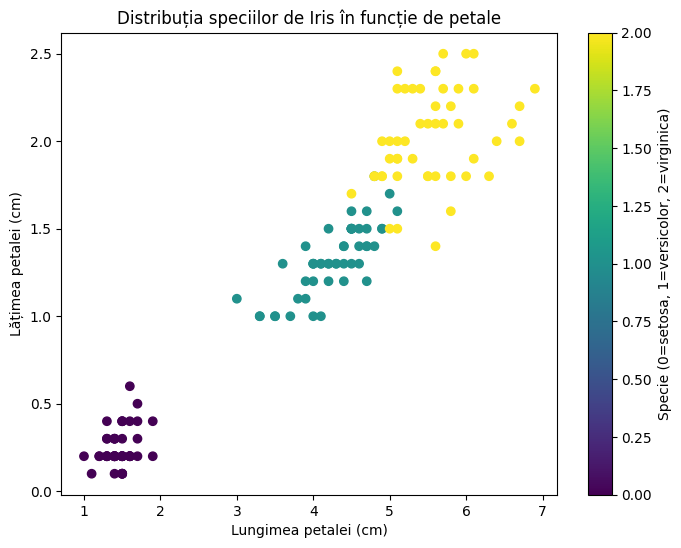

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['petal_length'], X['petal_width'], c=y, cmap='viridis')
plt.xlabel('Lungimea petalei (cm)')
plt.ylabel('Lățimea petalei (cm)')
plt.title('Distribuția speciilor de Iris în funcție de petale')
plt.colorbar(label='Specie (0=setosa, 1=versicolor, 2=virginica)')
plt.show()

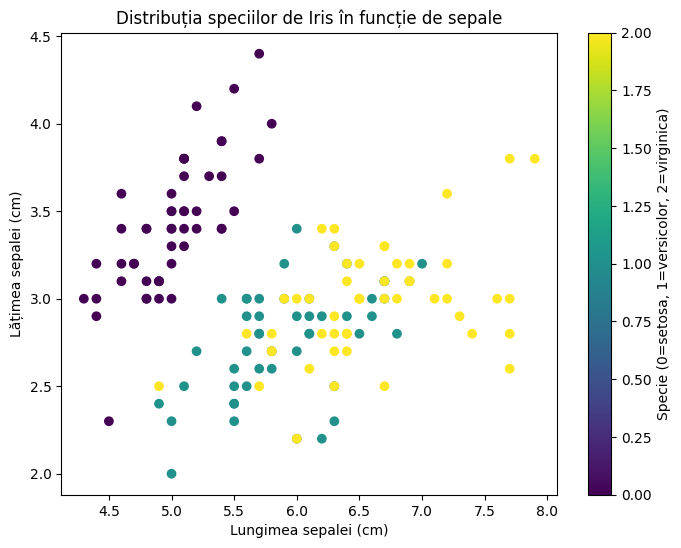

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal_length'], X['sepal_width'], c=y, cmap='viridis')
plt.xlabel('Lungimea sepalei (cm)')
plt.ylabel('Lățimea sepalei (cm)')
plt.title('Distribuția speciilor de Iris în funcție de sepale')
plt.colorbar(label='Specie (0=setosa, 1=versicolor, 2=virginica)')
plt.show()

In [ ]:
from math import floor

def split_train_test_set(X, y, test_size = 0.2, random_state = None, stratify = False):
    if random_state is not None:
      random.seed(random_state)

    X = np.array(X) if not isinstance(X, np.ndarray) else X
    y = np.array(y) if not isinstance(y, np.ndarray) else y

    n_samples = len(X)
    n_test = floor(n_samples * test_size)

    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    if stratify:
        unique_classes, counts = np.unique(y, return_counts=True)
        test_counts = (counts * test_size).astype(int)

        X_train, X_test = [], []
        y_train, y_test = [], []

        for cls in unique_classes:
            cls_indices = np.where(y_shuffled == cls)[0]
            np.random.shuffle(cls_indices)

            test_indices = cls_indices[:test_counts[cls]]
            X_test.extend(X_shuffled[test_indices])
            y_test.extend(y_shuffled[test_indices])

            train_indices = cls_indices[test_counts[cls]:]
            X_train.extend(X_shuffled[train_indices])
            y_train.extend(y_shuffled[train_indices])

        train_indices = np.arange(len(X_train))
        np.random.shuffle(train_indices)
        X_train = np.array(X_train)[train_indices]
        y_train = np.array(y_train)[train_indices]

        test_indices = np.arange(len(X_test))
        np.random.shuffle(test_indices)
        X_test = np.array(X_test)[test_indices]
        y_test = np.array(y_test)[test_indices]

    else:
        X_train, X_test = X_shuffled[n_test:], X_shuffled[:n_test]
        y_train, y_test = y_shuffled[n_test:], y_shuffled[:n_test]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_train_test_set(
    X, y, test_size=0.3, random_state=42, stratify=True
)

Problema 3 - cu tool

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def learn_multinomial_logistic_model(trainInputs, trainOutputs):
    classifier = LogisticRegression(multi_class='multinomial', max_iter=1000)
    classifier.fit(trainInputs, trainOutputs)

    w0 = classifier.intercept_
    w = classifier.coef_

    print('Model logistic multinomial:')
    for class_idx in range(len(w0)):
        print(f'\nClasa {class_idx} (y={class_idx}):')
        equation = f'P(y={class_idx}|x) = exp({w0[class_idx]:.4f}'
        for feat_idx in range(len(w[class_idx])):
            equation += f' + {w[class_idx][feat_idx]:.4f}*x{feat_idx + 1}'
        print(equation + ') / (suma exponenților pentru toate clasele)')

    print('\nCoeficienți:')
    print(f'Intercepte (w0): {w0}')
    for class_idx in range(len(w)):
        print(f'Coeficienții pentru clasa {class_idx}: {w[class_idx]}')

    acc = classifier.score(trainInputs, trainOutputs)
    print(f'\nAccuracy pe datele de antrenare: {acc:.2%}')

    y_pred = classifier.predict(trainInputs)
    return classifier, w0, w, y_pred

classifier, w0, w, y_pred = learn_multinomial_logistic_model(X_train, y_train)

Model logistic multinomial:

Clasa 0 (y=0):
P(y=0|x) = exp(9.2137 + -0.3952*x1 + 0.8029*x2 + -2.2789*x3 + -0.9880*x4) / (suma exponenților pentru toate clasele)

Clasa 1 (y=1):
P(y=1|x) = exp(1.9131 + 0.4977*x1 + -0.3478*x2 + -0.1278*x3 + -0.9029*x4) / (suma exponenților pentru toate clasele)

Clasa 2 (y=2):
P(y=2|x) = exp(-11.1268 + -0.1026*x1 + -0.4551*x2 + 2.4067*x3 + 1.8909*x4) / (suma exponenților pentru toate clasele)

Coeficienți:
Intercepte (w0): [  9.21370324   1.91314651 -11.12684974]
Coeficienții pentru clasa 0: [-0.39515402  0.80294991 -2.27889229 -0.98803041]
Coeficienții pentru clasa 1: [ 0.49771661 -0.3478449  -0.12782497 -0.90291144]
Coeficienții pentru clasa 2: [-0.10256259 -0.45510501  2.40671727  1.89094185]

Accuracy pe datele de antrenare: 97.14%


In [ ]:
test_accuracy = classifier.score(X_test, y_test)

print(f"Acuratețea pe setul de testare: {test_accuracy:.2f}")

Acuratețea pe setul de testare: 0.93


In [ ]:
new_flower = np.array([[5.35, 3.85, 1.25, 0.4]])  # Ordinea: sepal_l, sepal_w, petal_l, petal_w

new_flower_scaled = scaler.transform(new_flower)

predicted_class = classifier.predict(new_flower_scaled)[0]
predicted_prob = classifier.predict_proba(new_flower_scaled)[0]

species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

print(f"Specia prezisă: {predicted_class} ({species_names[predicted_class]})")
print(f"Probabilități pentru fiecare clasă:")
for class_idx, prob in enumerate(predicted_prob):
    print(f"- {species_names[class_idx]}: {prob:.2%}")

Specia prezisă: 0 (Iris-setosa)
Probabilități pentru fiecare clasă:
- Iris-setosa: 100.00%
- Iris-versicolor: 0.00%
- Iris-virginica: 0.00%


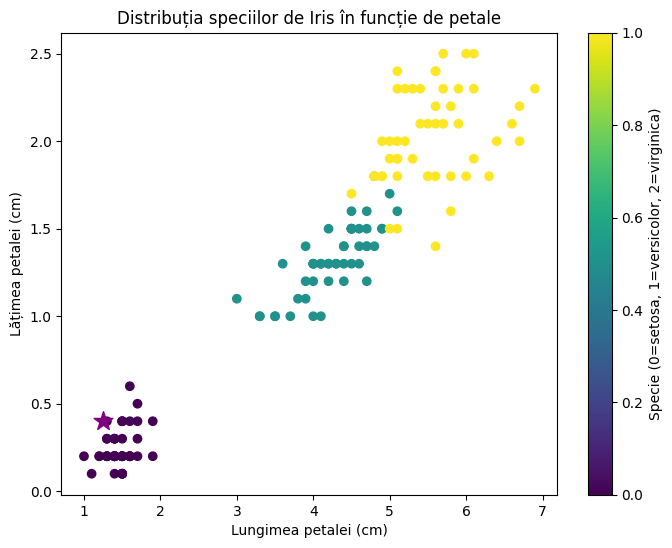

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['petal_length'], X['petal_width'], c=y, cmap='viridis')
plt.scatter(new_flower[0, 2], new_flower[0, 3], c='purple', s=200, marker='*')
plt.xlabel('Lungimea petalei (cm)')
plt.ylabel('Lățimea petalei (cm)')
plt.title('Distribuția speciilor de Iris în funcție de petale')
plt.colorbar(label='Specie (0=setosa, 1=versicolor, 2=virginica)')
plt.show()

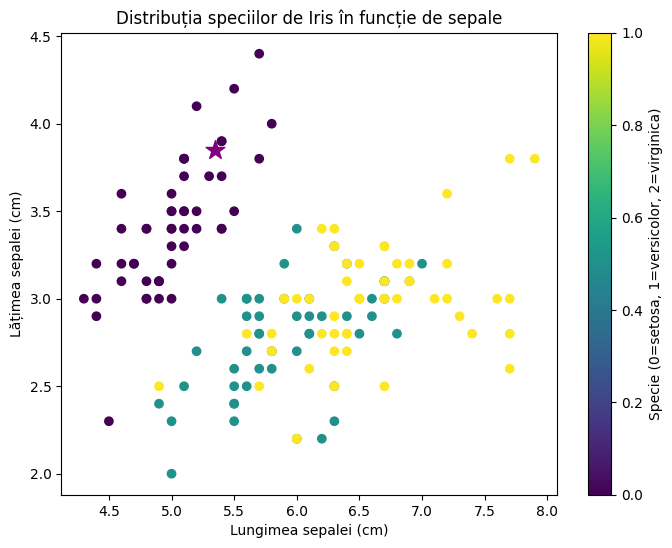

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal_length'], X['sepal_width'], c=y, cmap='viridis')
plt.scatter(new_flower[0, 0], new_flower[0, 1], c='purple', s=200, marker='*')
plt.xlabel('Lungimea sepalei (cm)')
plt.ylabel('Lățimea sepalei (cm)')
plt.title('Distribuția speciilor de Iris în funcție de sepale')
plt.colorbar(label='Specie (0=setosa, 1=versicolor, 2=virginica)')
plt.show()

Problema 3 - cod propriu


In [ ]:
class MyMultinomialLogisticRegression:
  def __init__(self, learning_rate=0.01, iterations=1000, l2_penalty=0.1, verbose=False):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.verbose = verbose
    self.l2_penalty = l2_penalty
    self.weights = None
    self.bias = None
    self.loss_history = []
    self.val_loss_history = []
    self.classes_ = None

  def softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def _compute_loss(self, y_true, y_pred):
    epsilon = 1e-9
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # One-hot encoding pentru y_true
    y_true_onehot = np.eye(len(self.classes_))[y_true]

    loss = -np.mean(np.sum(y_true_onehot * np.log(y_pred), axis=1))

    # Regularizare L2
    if self.l2_penalty > 0:
      loss += 0.5 * self.l2_penalty * np.sum(self.weights**2)

    return loss

  def fit(self, X, y, X_val=None, y_val=None):
        """Antrenare cu gradient descent"""
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for i in range(self.iterations):
            scores = np.dot(X, self.weights.T) + self.bias
            y_pred = self.softmax(scores)

            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)

            # One-hot encoding pentru y
            y_onehot = np.eye(n_classes)[y]

            error = y_pred - y_onehot
            dw = np.dot(error.T, X) / n_samples
            db = np.mean(error, axis=0)

            self.weights -= self.learning_rate * (dw + self.l2_penalty * self.weights)
            self.bias -= self.learning_rate * db

  def predict_proba(self, X):
        """Returnează probabilitățile pentru fiecare clasă"""
        scores = np.dot(X, self.weights.T) + self.bias
        return self.softmax(scores)

  def predict(self, X):
        """Returnează clasa cu cea mai mare probabilitate"""
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

  def _confusion_matrix(self, y_true, y_pred):
        """Calculează matricea de confuzie"""
        n_classes = len(self.classes_)
        cm = np.zeros((n_classes, n_classes), dtype=int)

        for true, pred in zip(y_true, y_pred):
            cm[true, pred] += 1

        return cm

  def _calculate_metrics(self, cm):
        n_classes = len(cm)
        metrics = {
            'precision': np.zeros(n_classes),
            'recall': np.zeros(n_classes),
            'f1': np.zeros(n_classes),
            'support': np.sum(cm, axis=1)
        }

        for i in range(n_classes):
            tp = cm[i,i]
            fp = np.sum(cm[:,i]) - tp
            fn = np.sum(cm[i,:]) - tp

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            metrics['precision'][i] = precision
            metrics['recall'][i] = recall
            metrics['f1'][i] = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        total_samples = np.sum(metrics['support'])
        weights = metrics['support'] / total_samples

        metrics['weighted_precision'] = np.sum(metrics['precision'] * weights)
        metrics['weighted_recall'] = np.sum(metrics['recall'] * weights)
        metrics['weighted_f1'] = np.sum(metrics['f1'] * weights)

        return metrics

  def accuracy_score(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

  def evaluate(self, X, y):
        y_pred = self.predict(X)
        y_proba = self.predict_proba(X)

        cm = self._confusion_matrix(y, y_pred)
        metrics = self._calculate_metrics(cm)

        # Calcul acuratețe
        accuracy = accuracy_score(y, y_pred)

        return {
            'accuracy': accuracy,
            'precision': metrics['weighted_precision'],
            'recall': metrics['weighted_recall'],
            'f1': metrics['weighted_f1'],
            'loss': self._compute_loss(y, y_proba),
        }

  def print_model(self, feature_names=None):
        """Afiseaza modelul in format similar cu cel din sklearn"""
        print('Model logistic multinomial:')
        for class_idx in range(len(self.bias)):
            print(f'\nClasa {class_idx} (y={class_idx}):')
            equation = f'P(y={class_idx}|x) = exp({self.bias[class_idx]:.4f}'
            for feat_idx in range(len(self.weights[class_idx])):
                feat_name = f'x{feat_idx+1}' if feature_names is None else feature_names[feat_idx]
                equation += f' + {self.weights[class_idx][feat_idx]:.4f}*{feat_name}'
            print(equation + ') / (suma exponenților pentru toate clasele)')

        print('\nCoeficienți:')
        print(f'Intercepte (bias): {self.bias}')
        for class_idx in range(len(self.weights)):
            print(f'Coeficienții pentru clasa {class_idx}: {self.weights[class_idx]}')

        print(f'\nNumăr de iterații: {self.iterations}')
        print(f'Rată de învățare: {self.learning_rate}')
        print(f'Parametru regularizare L2: {self.l2_penalty}')

In [ ]:
model = MyMultinomialLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train)

results = model.evaluate(X_test, y_test)
print(f"Acuratețe: {results['accuracy']:.4f}")
print(f"Precision: {results['precision']:.4f}")
print(f"Recall: {results['recall']:.4f}")
print(f"F1-score: {results['f1']:.4f}")
print(f"Loss: {results['loss']:.4f}")

Acuratețe: 0.6667
Precision: 0.5000
Recall: 0.6667
F1-score: 0.5556
Loss: 0.6432


In [ ]:
def learn_multinomial_logistic_model(trainInputs, trainOutputs):
    # Standardizare date (recomandat)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(trainInputs)

    # Creare si antrenare model
    model = MyMultinomialLogisticRegression(learning_rate=0.1, iterations=1000, verbose=True)
    model.fit(X_train_scaled, trainOutputs)

    # Afisare model
    model.print_model(feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

    acc = model.accuracy_score(trainOutputs, model.predict(X_train_scaled))
    print(f'\nAccuracy pe datele de antrenare: {acc:.2%}')

    y_pred = model.predict(X_train_scaled)
    return model, model.bias, model.weights, y_pred

classifier, w0, w, y_pred = learn_multinomial_logistic_model(X_train, y_train)

Model logistic multinomial:

Clasa 0 (y=0):
P(y=0|x) = exp(-0.2971 + -0.4714*sepal_length + 0.4456*sepal_width + -0.6939*petal_length + -0.6523*petal_width) / (suma exponenților pentru toate clasele)

Clasa 1 (y=1):
P(y=1|x) = exp(0.5608 + 0.1508*sepal_length + -0.3626*sepal_width + 0.0791*petal_length + -0.1569*petal_width) / (suma exponenților pentru toate clasele)

Clasa 2 (y=2):
P(y=2|x) = exp(-0.2637 + 0.3207*sepal_length + -0.0830*sepal_width + 0.6148*petal_length + 0.8091*petal_width) / (suma exponenților pentru toate clasele)

Coeficienți:
Intercepte (bias): [-0.29706961  0.56079218 -0.26372257]
Coeficienții pentru clasa 0: [-0.47142402  0.44562736 -0.69391508 -0.65225942]
Coeficienții pentru clasa 1: [ 0.15077251 -0.36263187  0.07914432 -0.15687705]
Coeficienții pentru clasa 2: [ 0.32065151 -0.0829955   0.61477076  0.80913647]

Număr de iterații: 1000
Rată de învățare: 0.1
Parametru regularizare L2: 0.1

Accuracy pe datele de antrenare: 92.38%


In [ ]:
test_accuracy = classifier.accuracy_score(y_test, classifier.predict(X_test))
print(f"Acuratețea pe setul de testare: {test_accuracy:.2f}")

Acuratețea pe setul de testare: 0.33


In [ ]:
new_flower = np.array([[5.35, 3.85, 1.25, 0.4]])

new_flower_scaled = scaler.transform(new_flower)

predicted_class = classifier.predict(new_flower_scaled)[0]
predicted_prob = classifier.predict_proba(new_flower_scaled)[0]

species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

print(f"Specia prezisă: {predicted_class} ({species_names[predicted_class]})")
print(f"Probabilități pentru fiecare clasă:")
for class_idx, prob in enumerate(predicted_prob):
    print(f"- {species_names[class_idx]}: {prob:.2%}")

Specia prezisă: 0 (Iris-setosa)
Probabilități pentru fiecare clasă:
- Iris-setosa: 92.55%
- Iris-versicolor: 6.70%
- Iris-virginica: 0.75%
